Name: Paola Granados 

Labpartner(s): Destiny Martinez 

In [1]:
#import statements go here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Class 10.2

# Warmups 10.2

If you do not complete the warmup during the class period, complete for homework and review/expand for weekly practice. These are basic coding skills you need to be comfortable with. Work on the following for 25 min and then we will go over them together:

**W.1** Write a function that returns a list of the first n powers of 2 (2^0, 2^1, 2^2, 2^3...2^n).

In [2]:
def exponents(n):
    start = 0
    exp_list = []
    while start < n:
        num = 2**start
        start = start + 1
        exp_list = exp_list + [num]
    return exp_list

In [3]:
exponents(8)

[1, 2, 4, 8, 16, 32, 64, 128]

**W.2** Using the function above, plot the first 100 powers of 2

Text(0, 0.5, 'Value (2^n)')

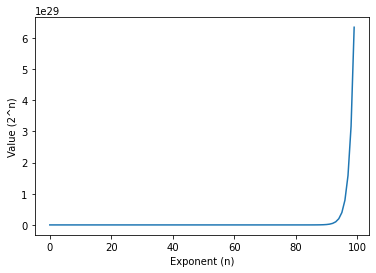

In [4]:
plt.plot(exponents(100))
plt.xlabel("Exponent (n)")
plt.ylabel("Value (2^n)")

# Lecture 10.1

### Agenda:
- Announcements
- Correlation 
- Introduction to fittng models to data

#### Announcements
- Congratulations to everyone who got over 20,000 points on data camp! +5 tokens for all of you. For those of you catching up, let me know if you reach this. There will be pizza and other prizes for the top token folks.
- August figured out the issue with making all the frames the same length in Davinci Resolve +2 tokens
- Reports that the last few datacamp chapters were unclear. What are good strategies for dealing with this?


### Correlation

### A note of caution:

"Correlation does not imply causation"

Example:
As ice cream sales increase, the rate of drowning deaths increases sharply.
Therefore, ice cream consumption causes drowning.

When we get data, we want to describe how variables relate to each other. The simplest question we can ask are two variables correlated, that is do they change togehter?

The metric we use for correlation is the Pearson correlation coefficient, which is hard to grasp intuitively from looking at the equation (see https://en.wikipedia.org/wiki/Correlation_and_dependence). Basically, correlation is a measure of how linearly correlated two variables are, and has values between 1 and -1. If the two variables fall on a straight line and the both increase together, then the correlation is 1. If one increases while the other decreases, the correlation is -1. Correlations near zero mean the two variables are not correlated. 

Let's use some movie data to test if budgets and gross earnings are correlated. This is from the pandas tutorial here https://www.dataquest.io/blog/excel-and-pandas/ which uses and IMDB dataset. See also the lectures from this class in Fall 2019 

You can download the data file on the above website.

In [5]:
file = "movies.xls"
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3]) 
#concatenate sheets to make them into 1 dataframe 

In [6]:
movies # over 5000 movies

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,D.W. Griffith,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,Harry F. Millarde,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,King Vidor,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,Fritz Lang,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
War & Peace,NaN,Drama|History|Romance|War,English,UK,TV-14,NaN,16.00,NaN,NaN,NaN,...,1000.0,888.0,502.0,4528,11000,1.0,9277,44.0,10.0,8.2
Wings,NaN,Comedy|Drama,English,USA,NaN,30.0,1.33,NaN,NaN,NaN,...,685.0,511.0,424.0,1884,1000,5.0,7646,56.0,19.0,7.3
Wolf Creek,NaN,Drama|Horror|Thriller,English,Australia,NaN,NaN,2.00,NaN,NaN,NaN,...,511.0,457.0,206.0,1617,954,0.0,726,6.0,2.0,7.1


(0.0, 800000000.0)

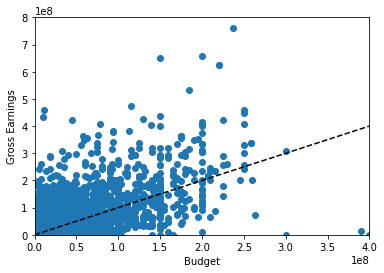

In [7]:
# let's plot earnings vs. budget and a 1 to 1 line

# plot Budget vs Gross Earnings
plt.scatter(movies['Budget'], movies['Gross Earnings'])
plt.plot([0,1E10],[0,1E10], 'k--')#just the straiaght line 
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xlim([0,0.04E10])#x limit
plt.ylim([0,.8E9])#y limit

In the above I have added the y=x line to visualize if the gross earnings were above the budget. 
Because many of the data points are on top of each other, it is difficult to assess visually the relationship between the two variables

Note that pandas allows us to get the correlation of the entire dataframe all at once. There are many other packages that will do this as well, including numpy.

In [8]:
movies.corr()
# Budget and Gross earnings are not very correlated, r = 0.10
#this correlates all of the variables against each other 

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Year,1.000000,-0.135038,0.159973,0.045726,0.030886,-0.063820,0.086873,0.101890,0.096137,0.109971,0.218678,0.061504,0.007397,-0.003147,0.275707,-0.209167
Duration,-0.135038,1.000000,-0.090071,0.074276,0.250298,0.173296,0.088449,0.131673,0.123558,0.123074,0.196605,0.013469,0.314765,0.328403,0.258486,0.261662
Aspect Ratio,0.159973,-0.090071,1.000000,0.006598,0.069346,0.001642,-0.020049,-0.007783,-0.003366,-0.017885,0.025737,0.013713,-0.014761,-0.024719,-0.049786,0.059445
Budget,0.045726,0.074276,0.006598,1.000000,0.102179,0.021090,0.022639,0.044236,0.047451,0.036557,0.062039,-0.019559,0.079621,0.084292,0.119994,0.030688
Gross Earnings,0.030886,0.250298,0.069346,0.102179,1.000000,0.144945,0.154468,0.262768,0.308026,0.247400,0.378082,-0.027755,0.637271,0.559958,0.480601,0.198021
Facebook Likes - Director,-0.063820,0.173296,0.001642,0.021090,0.144945,1.000000,0.090707,0.119587,0.120199,0.119532,0.162036,-0.041297,0.297045,0.221890,0.180674,0.170834
Facebook Likes - Actor 1,0.086873,0.088449,-0.020049,0.022639,0.154468,0.090707,1.000000,0.390466,0.249927,0.951660,0.135320,0.072204,0.192763,0.145461,0.190016,0.076153
Facebook Likes - Actor 2,0.101890,0.131673,-0.007783,0.044236,0.262768,0.119587,0.390466,1.000000,0.559662,0.628389,0.243464,0.071177,0.270755,0.219496,0.282306,0.083860
Facebook Likes - Actor 3,0.096137,0.123558,-0.003366,0.047451,0.308026,0.120199,0.249927,0.559662,1.000000,0.473920,0.278844,0.099368,0.287239,0.230189,0.271646,0.052633
Facebook Likes - cast Total,0.109971,0.123074,-0.017885,0.036557,0.247400,0.119532,0.951660,0.628389,0.473920,1.000000,0.209754,0.091410,0.265865,0.206923,0.263203,0.085854


### Introduction to linear regression

See https://en.wikipedia.org/wiki/Linear_regression and http://onlinestatbook.com/2/regression/regression.html for a nice introduction. See https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2 for a good intro on the math

Supposed we were convinced that gross earnings were linearly related to budget, i.e. G = a*B +c. To test this, we would fit the scatterplot we made above to a line, which would solve for the coefficients a (slope) and c (intercept) in our linear equation.

The basic idea of linear regression is that one finds the distance of each data point to a line and minimize this (using calculus) to find the best fit line. This is commonly called ordinary least squares, as the distance of the data from the linear model is squared.

Because the movies database has a number of NaNs (not a number, or missing values) in it, it's a bit difficult to work with (but see tips on revmoving NaNs in the resources page in github). Instead, let's do the tutorial here on linear regression using Boston housing data: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 This tutorial uses the package scikit-learn, which is a collection of advanced data analysis and machine learning functions. We will use this again in the future. Scikit-learn comes with a number of datasets to practice with, the housing data is one of them.


In [9]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [40]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

What we want to do here is to determine which variables contribute to housing prices

In [10]:
data?
# this is a new type of thing, a bunch

In [11]:
# information on the data:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

It is really common in scikitlearn to break the data up into a target dataset, the thing one is trying to predict, and all the factors that may affect that target variable

In [41]:
# convert the data set into a pandas data frame  
df = pd.DataFrame(data.data, columns=data.feature_names)
    # has all the values that might influence housing value

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [42]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [59]:
type(target)

pandas.core.frame.DataFrame

Create a second dataframe with the housing value added as a column. 
What variables correlate most with housing value? Hypothesize why this might be.

In [15]:
# create a second dataframe that has MEDV in it so we can look at correlation`
df2 = df
df2['MEDV'] = target.MEDV

In [16]:
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [17]:
df2.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


LSTAT, % lower status of the population, correlates negatively, which is not surprising.

RM, the number of rooms, has the highest positive correlation

In [18]:
# are room numbers and value correlated?
np.corrcoef(df["RM"], target["MEDV"])

# note this is a matrix of correlation coefficients, you only need the top right one

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

Text(0, 0.5, 'House value ($1000s)')

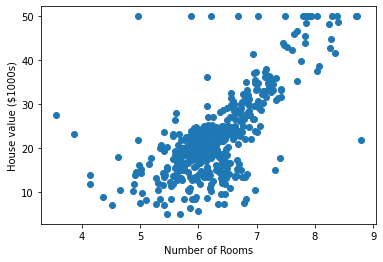

In [19]:
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

### Doing a linear regression using scipy

In [20]:
from scipy import stats

In [21]:
stats.linregress?

In [22]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["RM"],target["MEDV"])

this gives us the slope and intercept of the line, the corrlation (r_value)

A low p-value (< 0.05) indicates that the linear regression is a good model

the standard error is the standard deviation of the data from the model (as opposed to the standard deviation from the mean of the data)

In [23]:
slope

9.102108981180306

In [24]:
intercept

-34.67062077643854

In [25]:
r_value
# note this is the same correlation value we got before

0.695359947071539

In [26]:
p_value
# is this good? Do we have confidence in our linear model?

2.487228871008377e-74

In [27]:
std_err

0.41902656012134054

Text(0, 0.5, 'House value ($1000s)')

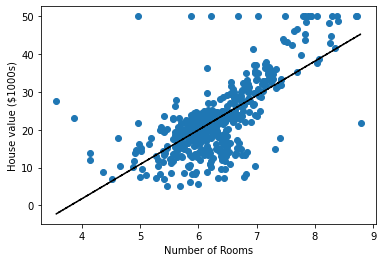

In [28]:
# let's plot the data with the linear fit and see how it looks
plt.plot(df["RM"], slope*df["RM"]+intercept, 'k--') # y = mx+b
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

### Doing a linear regression using statsmodels

Statsmodels is a powerful statistics package that is very popular

See https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

and

https://www.statsmodels.org/dev/index.html

http://www.statsmodels.org/dev/examples/index.html#linear-regression-models

In [29]:
import statsmodels.api as sm

In [30]:
# look at the helpfiles for OLS, ordinary least squares fitting, aka linear fitting
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  Ordinary Least Squares
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result s

In [31]:
# same data as before:
X = df["RM"] # what we think the cost depends on, rooms
y = target["MEDV"]

In [32]:
# Note y, the target of what we are fitting to, goes first:
model = sm.OLS(y, X).fit()

# this is fitting y = aX, with no constant, i.e. using an intercept of zero

In [33]:
model.params

RM    3.65335
dtype: float64

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Sat, 27 Mar 2021   Prob (F-statistic):                   3.74e-256
Time:                        22:28:10   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
predictions = model.predict(X) # make the predictions by the model

Text(0, 0.5, 'House value ($1000s)')

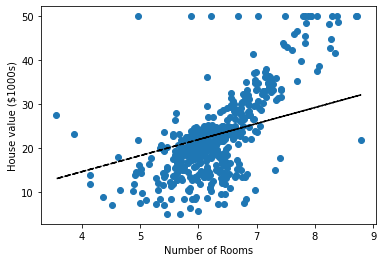

In [36]:
# let's plot the result like we did before

plt.plot(X,predictions, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

# this is not a very good fit, because we assumed the intercept of the line was zero

# Lab 10.2

**E.1** What kind of thing is movies? How do you know?

Once we imported the movies excel file into jupyterlab notebook, the movies data was converted into a Pandas DataFrame. 

In [139]:
type(movies)

pandas.core.frame.DataFrame

**E.2**  What does it mean that year and duration in movies are negatively correlated? Plot these two variables togther and explain.

In [44]:
movies

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,D.W. Griffith,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,Harry F. Millarde,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,King Vidor,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,Fritz Lang,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
War & Peace,NaN,Drama|History|Romance|War,English,UK,TV-14,NaN,16.00,NaN,NaN,NaN,...,1000.0,888.0,502.0,4528,11000,1.0,9277,44.0,10.0,8.2
Wings,NaN,Comedy|Drama,English,USA,NaN,30.0,1.33,NaN,NaN,NaN,...,685.0,511.0,424.0,1884,1000,5.0,7646,56.0,19.0,7.3
Wolf Creek,NaN,Drama|Horror|Thriller,English,Australia,NaN,NaN,2.00,NaN,NaN,NaN,...,511.0,457.0,206.0,1617,954,0.0,726,6.0,2.0,7.1


In [65]:
movies_dropna = movies.dropna(subset = ["Year","Duration"])

In [66]:
movies_dropna

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,D.W. Griffith,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,Harry F. Millarde,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,King Vidor,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,Fritz Lang,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Warcraft,2016.0,Action|Adventure|Fantasy,English,USA,PG-13,123.0,2.35,160000000.0,46978995.0,Duncan Jones,...,3000.0,716.0,648.0,5505,89000,0.0,111609,781.0,275.0,7.3
Xi you ji zhi: Sun Wukong san da Baigu Jing,2016.0,Action|Adventure|Fantasy,English,China,NaN,119.0,2.35,68005000.0,NaN,Pou-Soi Cheang,...,879.0,107.0,22.0,1026,426,1.0,1212,9.0,14.0,6.0
X-Men: Apocalypse,2016.0,Action|Adventure|Sci-Fi,English,USA,PG-13,144.0,2.35,178000000.0,154985087.0,Bryan Singer,...,34000.0,13000.0,1000.0,49684,54000,6.0,148379,622.0,396.0,7.3


Text(0, 0.5, 'Duration')

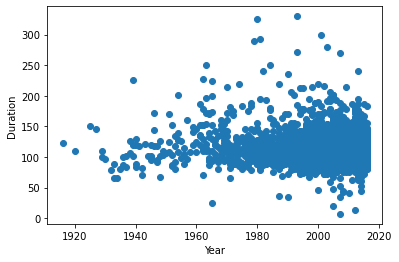

In [68]:
#plot year against duration
plt.scatter(movies_dropna["Year"],movies_dropna["Duration"])
plt.xlabel("Year")
plt.ylabel("Duration")

In [70]:
#find correlation coeff between Year and Duration 
np.corrcoef(movies_dropna["Year"], movies_dropna["Duration"])

array([[ 1.        , -0.13503757],
       [-0.13503757,  1.        ]])

Plotting Year vs Duration gives an odd shape, that doesn't really look positively or negatively correlated. However, by finding the correlation coefficient, we find that Year and Duration of movies are slightly negatively correlated with a correlation coeff of -0.135

In [141]:
slope, intercept, r_value, p_value, std_err = stats.linregress(movies_dropna["Year"],movies_dropna["Duration"])

Text(0, 0.5, 'Duration')

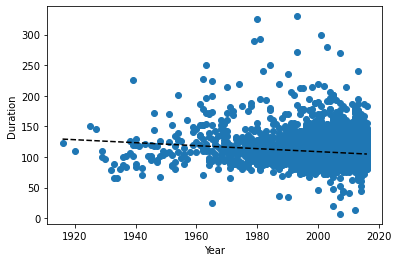

In [143]:
plt.plot(movies_dropna["Year"], slope*movies_dropna["Year"]+intercept, 'k--') # y = mx+b
plt.scatter(movies_dropna["Year"], movies_dropna["Duration"])
plt.xlabel('Year')
plt.ylabel('Duration')

By fitting to a linear regression model, we can see the slight negative linear relationship between Year and Duration

**E.3** Which pairs of variables in the movies dataset have the highest correlation? What might explain this?

In [71]:
#correlation matrix for movies
movies.corr()

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Year,1.000000,-0.135038,0.159973,0.045726,0.030886,-0.063820,0.086873,0.101890,0.096137,0.109971,0.218678,0.061504,0.007397,-0.003147,0.275707,-0.209167
Duration,-0.135038,1.000000,-0.090071,0.074276,0.250298,0.173296,0.088449,0.131673,0.123558,0.123074,0.196605,0.013469,0.314765,0.328403,0.258486,0.261662
Aspect Ratio,0.159973,-0.090071,1.000000,0.006598,0.069346,0.001642,-0.020049,-0.007783,-0.003366,-0.017885,0.025737,0.013713,-0.014761,-0.024719,-0.049786,0.059445
Budget,0.045726,0.074276,0.006598,1.000000,0.102179,0.021090,0.022639,0.044236,0.047451,0.036557,0.062039,-0.019559,0.079621,0.084292,0.119994,0.030688
Gross Earnings,0.030886,0.250298,0.069346,0.102179,1.000000,0.144945,0.154468,0.262768,0.308026,0.247400,0.378082,-0.027755,0.637271,0.559958,0.480601,0.198021
Facebook Likes - Director,-0.063820,0.173296,0.001642,0.021090,0.144945,1.000000,0.090707,0.119587,0.120199,0.119532,0.162036,-0.041297,0.297045,0.221890,0.180674,0.170834
Facebook Likes - Actor 1,0.086873,0.088449,-0.020049,0.022639,0.154468,0.090707,1.000000,0.390466,0.249927,0.951660,0.135320,0.072204,0.192763,0.145461,0.190016,0.076153
Facebook Likes - Actor 2,0.101890,0.131673,-0.007783,0.044236,0.262768,0.119587,0.390466,1.000000,0.559662,0.628389,0.243464,0.071177,0.270755,0.219496,0.282306,0.083860
Facebook Likes - Actor 3,0.096137,0.123558,-0.003366,0.047451,0.308026,0.120199,0.249927,0.559662,1.000000,0.473920,0.278844,0.099368,0.287239,0.230189,0.271646,0.052633
Facebook Likes - cast Total,0.109971,0.123074,-0.017885,0.036557,0.247400,0.119532,0.951660,0.628389,0.473920,1.000000,0.209754,0.091410,0.265865,0.206923,0.263203,0.085854



Facebook likes actor 1 and facebook likes - cast total have a high correlation value of 0.95166. This high correlation could be due to the fact that the facebook likes for Actor 1 would be included within the Facebook likes for the cast total 

**E.4** Remake the house value vs. number of rooms plot and write the equation of the fitted line the title or as an annotation

In [72]:
#linear regression of rooms to house value 
slope, intercept, r_value, p_value, std_err = stats.linregress(df["RM"],target["MEDV"])

In [78]:
slope

9.102108981180306

In [79]:
intercept

-34.67062077643854

Text(0.5, 1.0, 'Y = 9.10x-34.67')

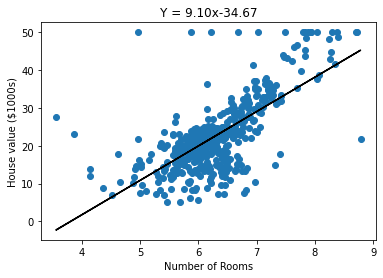

In [81]:
#plotting the rooms vs house value 
plt.plot(df["RM"], slope*df["RM"]+intercept,"k") # y = mx+b
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')
plt.title("Y = 9.10x-34.67")

**E.5** Following the same method, make a linear model for the house value as a function of the LSTAT (% lower status of the population). Plot your result and the resulting model, and annotate your result with the model equation. How good is this model compared to the one with the number of rooms? Use the statistcs returned by the linear regression function to support your argument.

In [82]:
#linear regression of LSTAT to house value 
slope, intercept, r_value, p_value, std_err = stats.linregress(df["LSTAT"],target["MEDV"])

In [83]:
slope

-0.9500493537579909

In [84]:
intercept

34.55384087938311

Text(20, 30, 'y = -0.95x + 34.55')

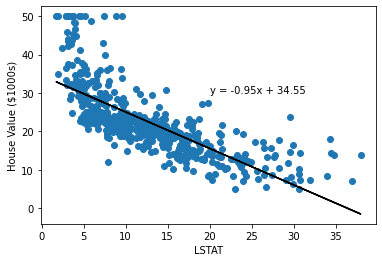

In [92]:
#plot LSTAT vs house value 
plt.scatter(df["LSTAT"],target["MEDV"])
plt.plot(df["LSTAT"],slope*df["LSTAT"]+intercept,"k")
plt.xlabel("LSTAT")
plt.ylabel("House Value ($1000s)")
plt.annotate("y = -0.95x + 34.55", (20,30))

**E.6** Following the example in the documentation below, add an intercept to the statsmodels housing model and plot your result

http://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

In [100]:
# same data as before:
X = df["RM"] # what we think the cost depends on, rooms
y = target["MEDV"]


In [101]:
#add a series of constants (1s) to X data 
X=sm.add_constant(X)

In [103]:
#fit to OLS
model = sm.OLS(y, X).fit()

In [105]:
#check our model parameters
#we now have a slope and y-intercept same as the linear regression method 
model.params

const   -34.670621
RM        9.102109
dtype: float64

In [106]:

predictions = model.predict(X)

Text(0, 0.5, 'House value ($1000s)')

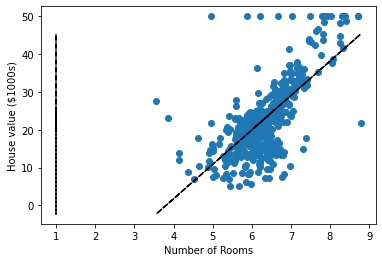

In [108]:
#plot our # of rooms vs house value, including our projected linear relationship
#I'm not sure how to remove the line of the constant
plt.plot(X,predictions, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

**E.7** (Advanced/optional, +1 token) Do the tutorial here to use scikitlearn to do a linear model: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [112]:
#import data 
from sklearn.datasets import load_boston 
boston_dataset = load_boston()
import seaborn as sns

In [113]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [114]:
#add MEDV to dataframe 
boston["MEDV"]=boston_dataset.target

<AxesSubplot:>

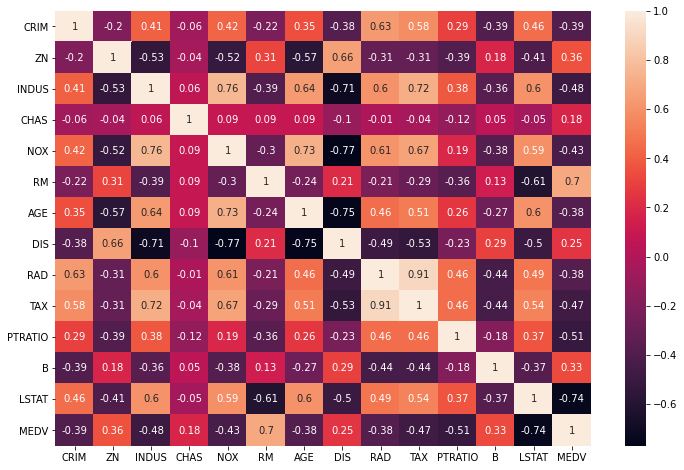

In [122]:
#correlation matrix 
correlation_matrix = boston.corr().round(2)
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(data = correlation_matrix, annot = True)

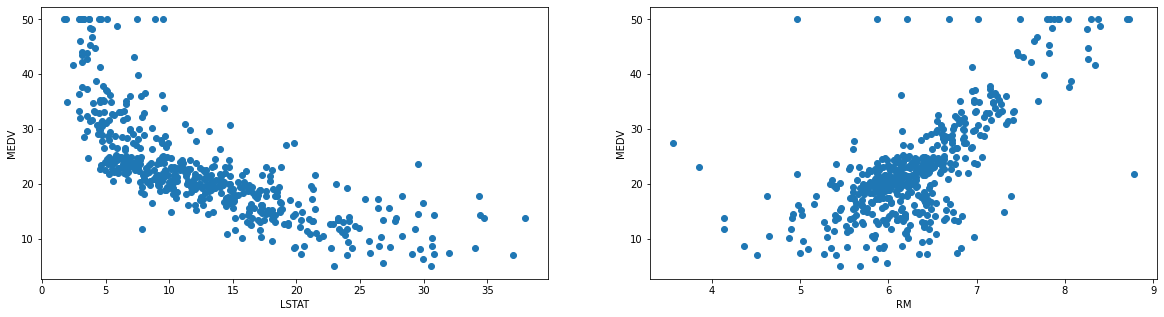

In [123]:
#Plot LSTAT and RM vs Housing Value 
#They have a high correlation with our target value 

plt.figure(figsize=(20,5))

features =["LSTAT","RM"]
target = boston["MEDV"]

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x,y, marker = "o")
    plt.xlabel(col)
    plt.ylabel("MEDV")

In [124]:
#Begin Training the model 
#concatenate LSTAT and RM 
X = pd.DataFrame(np.c_[boston["LSTAT"],boston["RM"]], columns = ["LSTAT","RM"])
Y = boston["MEDV"]

In [125]:
#split into training and testing sets 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [128]:
#Use linear regression to train model on both sets 
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [137]:
#Model Evaluation for Training set 
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


In [138]:
#Model Evaluation for Testing set 
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953
